<a href="https://colab.research.google.com/github/MideOludoyi/Data-Science-Projetcs/blob/master/Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1QUhzsMBVtLQWI1mqYOmF7ugU996cMVbB'

In [0]:
fluff, id = link.split('=')
print (id)

1QUhzsMBVtLQWI1mqYOmF7ugU996cMVbB


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('finalPaylater.csv')  
df = pd.read_csv('finalPaylater.csv')

In [0]:
# The code below when executed loads the packages required to run this notebook
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline


In [0]:
# Printing out the shape of the dataframe
print(df.shape)
df.head()

(159596, 34)


,clientId,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,clientTimeAtEmployer,...,loanTerm,max_amount_taken,max_tenor_taken,rILoanId,repaidDate,rIdueDate,settleDays,firstpaymentRatio,firstPaymentDefault,loanDefault
0,755398623,52500.0,false,29,FEMALE,Single,business,Rented,KANO,7,...,60,1,1,302039538823,2018-08-01 11:30:31 UTC,2018-08-13 12:00:00 UTC,-12,0.0,0,0
1,915689736,52500.0,false,25,MALE,Single,business,Rented,LAGOS,21,...,60,0,1,302251936174,2018-09-06 05:34:55 UTC,2018-09-21 12:00:00 UTC,-15,0.0,0,0
2,292629156,35000.0,false,32,MALE,Single,education,Rented,ANAMBRA,29,...,60,0,1,302270229003,2018-11-27 01:33:56 UTC,2018-09-24 12:00:00 UTC,64,0.0,1,1
3,671710636,35000.0,false,28,FEMALE,Married,business,Own Residence,OSUN,36+,...,60,1,1,301929229685,2018-07-09 06:48:44 UTC,2018-07-19 12:00:00 UTC,-10,0.0,0,0
4,367769827,35000.0,false,34,MALE,Married,medical,Rented,ONDO,36+,...,60,1,1,301841795739,2018-07-14 02:28:10 UTC,2018-07-02 12:00:00 UTC,12,0.0,1,1


In [0]:
# checking the column data types and non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159596 entries, 0 to 159595
Data columns (total 41 columns):
clientId                     159596 non-null int64
clientIncome                 159596 non-null float64
incomeVerified               159596 non-null object
clientAge                    159596 non-null int64
clientGender                 159596 non-null object
clientMaritalStatus          159596 non-null object
clientLoanPurpose            159596 non-null object
clientResidentialStauts      159596 non-null object
clientState                  159596 non-null object
clientTimeAtEmployer         159596 non-null float64
clientNumberPhoneContacts    159596 non-null int64
clientAvgCallsPerDay         159596 non-null float64
loanNumber                   159596 non-null int64
applicationDate              159596 non-null datetime64[ns]
approvalDate                 159596 non-null datetime64[ns]
declinedDate                 7 non-null datetime64[ns]
disbursementDate             159596 non

From the above , it seems that there are not missing values but exploratory analysis will provide more hidden information about the dataset.

In [0]:
# Checking for the rate of uniqueness in our data and sorting it out
uniqueness = df.apply(lambda x: len(pd.unique(x)),axis = 0).sort_values(ascending = False) 

In [0]:
print(uniqueness)

rILoanId                     159596
loanId                       159596
RPdueDate                    157900
repaidDate                   138121
paidAt                       125482
clientAvgCallsPerDay         100307
clientId                      91904
clientIncome                   9362
clientNumberPhoneContacts      7378
firstpaymentRatio              4875
loanAmount                      483
settleDays                      419
applicationDate                 316
approvalDate                    316
disbursementDate                305
rIdueDate                       301
interestRate                    133
clientAge                        44
clientTimeAtEmployer             41
clientState                      40
loanNumber                       32
clientMaritalStatus               6
declinedDate                      6
clientResidentialStauts           6
clientLoanPurpose                 5
incomeVerified                    3
loanTerm                          3
clientGender                

From the above information, it's clear the rate of recurring of the variables

In [0]:
# dropping some variables considering their recurring rate
df.drop(['loanType','payout_status','loanId'], axis=1, inplace=True)

In [0]:
# Checking for outliers, mistyped parameter, recurring values
dict_values = {a:b.value_counts() for a,b in df.items()}

In [0]:
dict_values

{'RPdueDate': 2018-10-23 11:00:00 UTC    95
 2018-11-22 11:00:00 UTC    88
 2018-10-22 11:00:00 UTC    53
 2018-11-21 11:00:00 UTC    52
 2018-11-23 11:00:00 UTC    13
 2018-05-24 08:06:56 UTC     9
 2018-05-24 08:06:59 UTC     8
 2018-10-24 11:00:00 UTC     7
 2018-05-24 08:06:57 UTC     6
 2018-05-21 08:06:41 UTC     6
 2018-05-23 08:04:26 UTC     6
 2018-05-22 08:08:14 UTC     6
 2018-05-20 08:07:26 UTC     6
 2018-05-23 08:04:25 UTC     6
 2018-05-24 08:07:00 UTC     6
 2018-05-24 08:06:55 UTC     5
 2018-05-24 08:07:01 UTC     5
 2018-05-24 08:06:58 UTC     5
 2018-05-25 08:06:10 UTC     5
 2018-05-26 08:07:05 UTC     5
 2018-05-20 08:07:21 UTC     4
 2018-05-22 08:08:18 UTC     4
 2018-05-26 08:06:46 UTC     4
 2018-05-21 08:06:39 UTC     4
 2018-06-19 08:07:26 UTC     4
 2018-05-23 08:04:29 UTC     4
 2018-05-24 08:06:54 UTC     4
 2018-05-22 08:08:16 UTC     4
 2018-05-20 08:07:14 UTC     4
 2018-05-25 08:06:11 UTC     4
                            ..
 2018-09-24 10:44:41 UTC  

In [0]:
# checking for statistical analysis of numerical variables
df.describe()

,clientId,clientIncome,clientAge,loanNumber,loanAmount,interestRate,loanTerm,max_amount_taken,max_tenor_taken,settleDays,firstpaymentRatio,firstPaymentDefault,loanDefault
count,1.595960e+05,1.595960e+05,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000
mean,4.980082e+08,9.083906e+04,33.691847,3.556806,35324.184190,13.331235,85.385599,0.705275,0.915374,32.602127,0.097991,0.294268,0.279894
std,2.938655e+08,9.728033e+04,7.180870,2.471578,27840.824297,4.467938,39.323756,0.455921,0.278325,84.552571,0.278058,0.455714,0.448948
min,5.060000e+02,3.000000e+01,18.000000,1.000000,11000.000000,4.500000,60.000000,0.000000,0.000000,-32.000000,0.000000,0.000000,0.000000
25%,2.475166e+08,3.500000e+04,28.000000,2.000000,20000.000000,10.000000,60.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000
50%,4.971904e+08,5.511621e+04,33.000000,3.000000,25500.000000,12.500000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.463713e+08,1.050000e+05,38.000000,4.000000,37500.000000,15.000000,90.000000,1.000000,1.000000,13.000000,0.000000,1.000000,1.000000
max,9.365832e+09,3.925000e+06,138.000000,32.000000,500000.000000,20.000000,180.000000,1.000000,1.000000,386.000000,1.000000,1.000000,1.000000


In [0]:
# extracting numerical features
num_var=df.select_dtypes(include=np.number)
num_var.head()

,clientId,clientIncome,clientAge,loanNumber,loanAmount,interestRate,loanTerm,max_amount_taken,max_tenor_taken,settleDays,firstpaymentRatio,firstPaymentDefault,loanDefault
0,755398623,52500.0,29,6,16000,20.0,60,1,1,-12,0.0,0,0
1,915689736,52500.0,25,9,14500,15.0,60,0,1,-15,0.0,0,0
2,292629156,35000.0,32,2,19500,15.0,60,0,1,64,0.0,1,1
3,671710636,35000.0,28,4,19500,15.0,60,1,1,-10,0.0,0,0
4,367769827,35000.0,34,5,17500,12.5,60,1,1,12,0.0,1,1


In [0]:
# carrying out detailed exploratory analysis on clientAge
dict_values['clientAge']

33     9301
32     9204
34     8899
31     8854
29     8485
35     8460
30     8298
28     7978
27     7214
36     6969
37     6897
38     6479
26     6394
25     6020
39     5350
24     4747
40     4431
41     4090
23     4006
42     3760
43     3175
22     2977
44     2486
45     2340
21     1696
46     1663
47     1648
48     1529
49     1229
50     1118
52      875
51      805
53      746
54      598
55      522
56       94
58       94
57       75
59       52
60       23
20       10
18        3
19        1
138       1
Name: clientAge, dtype: int64

In [0]:
# checking the information, the outliers must be treated by finding the mean
df.clientAge.replace({138: int(df.clientAge.mean())},inplace=True)

In [0]:
# sorting the value count to check its distribution
df.clientAge.value_counts().sort_values()

19       1
18       3
20      10
60      23
59      52
57      75
58      94
56      94
55     522
54     598
53     746
51     805
52     875
50    1118
49    1229
48    1529
47    1648
46    1663
21    1696
45    2340
44    2486
22    2977
43    3175
42    3760
23    4006
41    4090
40    4431
24    4747
39    5350
25    6020
26    6394
38    6479
37    6897
36    6969
27    7214
28    7978
30    8298
35    8460
29    8485
31    8854
34    8899
32    9204
33    9302
Name: clientAge, dtype: int64

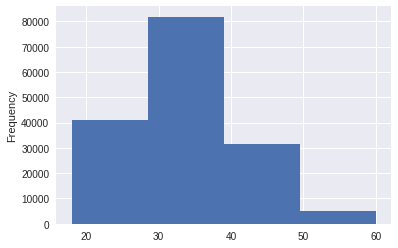

In [0]:
# This section of code visualize and helps to understand the distribution of the clients age
df.clientAge.plot(kind='hist',bins=4)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


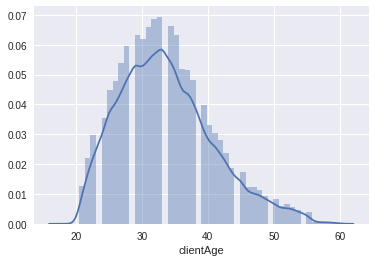

In [0]:
# distribution plot
ax = sns.distplot(df.clientAge,  kde=True);

In [0]:
# create a new feature using client Age based on the observation above
bins=[18,30,40,50,60]
group=['Young','Adult','Elder','More-elderly']
df['clientAge_bin']=pd.cut(df['clientAge'],bins,labels=group)

In [0]:
# label encoding on the new features
df['clientAge_bin']= df['clientAge_bin'].replace({'Young':0,'Adult':1,'Elder':2,'More-elderly':3})

In [0]:
# calculating the mean income of each default category
df.groupby('loanDefault').clientIncome.mean()

loanDefault
0    92973.982652
1    85346.362523
Name: clientIncome, dtype: float64

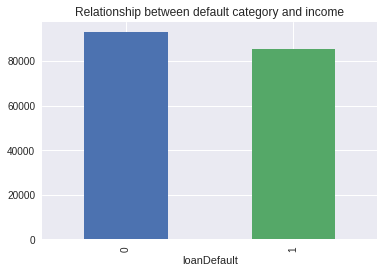

In [0]:
# chart showing correlation between default category and income
plt.title('Relationship between default category and income')
df.groupby('loanDefault').clientIncome.mean().plot(kind='bar');

In [0]:
# calculating the mean income for delinquency
df.groupby('firstPaymentDefault').clientIncome.mean()

firstPaymentDefault
0    93551.918985
1    84332.897644
Name: clientIncome, dtype: float64

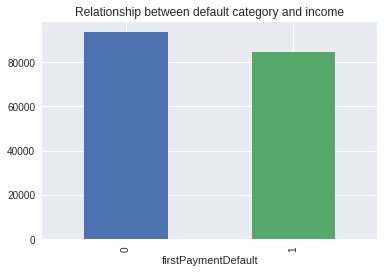

In [0]:
# chart showing correlation between default category and income
plt.title('Relationship between default category and income')
df.groupby('firstPaymentDefault').clientIncome.mean().plot(kind='bar');

From the above, it can be affirmed indeed "that correlation is not causation" as client income can not be said to be a determinant of deliquency or loan default.
Further Feature selection process is encouraged.

In [0]:
#creating a new set of feature
df['loanIncome_diff'] =df['clientIncome']-df['loanAmount']

In [0]:
## creating a new features (categorical variable) to indicate if the loanIncome_diff is positive or negative
df['amount_diff'] = 'eq'
df.loc[df['loanIncome_diff'] > 0,'amount_diff'] = 'less'

In [0]:
# label encoding for amt_difference column
df.amount_diff= df["amount_diff"].replace({'eq':0,'less':1})

In [0]:
# check the distribution
df.amount_diff.value_counts()

1    124189
0     35407
Name: amount_diff, dtype: int64

In [0]:
# checking the new features for  increase in correlation with the target variable
correlations_data = df.corr()['loanDefault'].sort_values()
correlations_data.head()

loanNumber      -0.080460
clientAge       -0.048228
clientAge_bin   -0.042138
amount_diff     -0.036371
clientIncome    -0.035201
Name: loanDefault, dtype: float64

From the information above, amount_diff is well correlated

In [0]:
# Carrying out a detail exploratory analysis on loanNumber
df.loanNumber.value_counts().sort_values()

32        2
31        2
30        2
29        7
28        8
27       13
26       14
25       20
24       24
23       38
22       50
21       93
20      113
19      147
18      190
17      223
16      301
15      348
14      430
13      465
12      605
11      768
10     1114
9      1526
8      2377
7      4006
1      6748
6      7303
5     12804
4     22595
3     39830
2     57430
Name: loanNumber, dtype: int64

In [0]:
# define a function to analyse columns based on count and percentage counts
#print count for columns that only has few uniques
def column_analyse(x,df = df): 
    print(df[x].value_counts(),"\n",
          df[x].value_counts()/len(df[x]))

In [0]:
column_analyse('loanNumber')

2     57430
3     39830
4     22595
5     12804
6      7303
1      6748
7      4006
8      2377
9      1526
10     1114
11      768
12      605
13      465
14      430
15      348
16      301
17      223
18      190
19      147
20      113
21       93
22       50
23       38
24       24
25       20
26       14
27       13
28        8
29        7
31        2
30        2
32        2
Name: loanNumber, dtype: int64 
 2     0.359846
3     0.249568
4     0.141576
5     0.080228
6     0.045759
1     0.042282
7     0.025101
8     0.014894
9     0.009562
10    0.006980
11    0.004812
12    0.003791
13    0.002914
14    0.002694
15    0.002181
16    0.001886
17    0.001397
18    0.001191
19    0.000921
20    0.000708
21    0.000583
22    0.000313
23    0.000238
24    0.000150
25    0.000125
26    0.000088
27    0.000081
28    0.000050
29    0.000044
31    0.000013
30    0.000013
32    0.000013
Name: loanNumber, dtype: float64


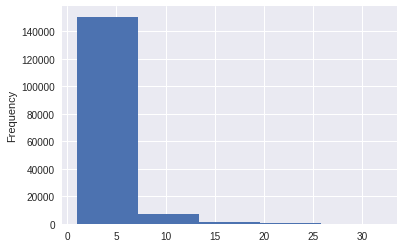

In [0]:
#visualizing the distribution
df.loanNumber.plot(kind='hist',bins=5)

In [0]:
#new features from loanNumber 
df['reten_measure'] = 0
df.loc[df['loanNumber'] > 5,'reten_measure'] = 1

In [0]:
# checking the new features for increase in correlation with the target variable
correlations_data = df.corr()['loanDefault'].sort_values()
correlations_data.head()

loanNumber      -0.080460
reten_measure   -0.075902
clientAge       -0.048228
clientAge_bin   -0.042138
amount_diff     -0.036371
Name: loanDefault, dtype: float64

In [0]:
# The statistical analysis of clientIncome to decide for a binning range
df.clientIncome.describe(percentiles=[.01,.05,.1,.25,.4,.5,.75,.85,.95,.99])

count    1.595960e+05
mean     9.083906e+04
std      9.728033e+04
min      3.000000e+01
1%       1.200000e+04
5%       1.750000e+04
10%      1.750000e+04
25%      3.500000e+04
40%      5.000000e+04
50%      5.511621e+04
75%      1.050000e+05
85%      1.500000e+05
95%      2.800000e+05
99%      5.250000e+05
max      3.925000e+06
Name: clientIncome, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


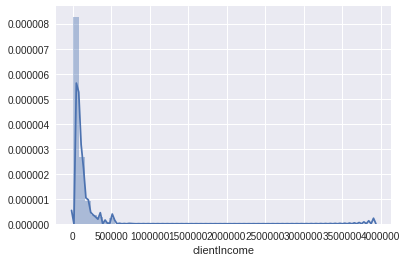

In [0]:
# checking if the income is normally distributed and possible outlier
ax = sns.distplot(df.clientIncome,  kde=True);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


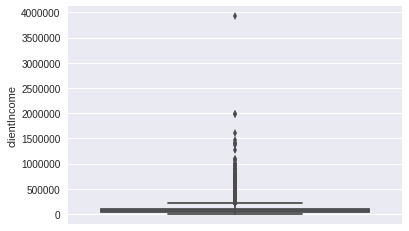

In [0]:
# checking income distribution for outliers
a=sns.boxplot(y='clientIncome',data=df,notch=False);

In [0]:
# Log transformation to treat the outlier
df['log_clientIncome'] = [np.log(x) for x in df['clientIncome']]



In [0]:
# comparing both the original data and the transformed data
df[['clientIncome','log_clientIncome']].head()

,clientIncome,log_clientIncome
0,52500.0,10.868568
1,52500.0,10.868568
2,35000.0,10.463103
3,35000.0,10.463103
4,35000.0,10.463103


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


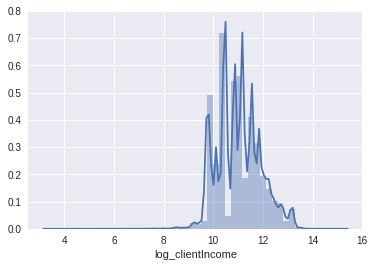

In [0]:
# Visualizing the transformed data
ax = sns.distplot(df.log_clientIncome,  kde=True);

A new set of feature is created to normalize the clientIncome distribution

In [0]:
# create a new feature by binning client income based on the observation above
bins=[0,50000,150000,500000,4000000]
group=['Low','Average','High','Very High']
df['clientIncome_bin']=pd.cut(df['clientIncome'],bins,labels=group)

In [0]:
df.clientIncome_bin

0         Average
1         Average
2             Low
3             Low
4             Low
5             Low
6             Low
7            High
8         Average
9         Average
10        Average
11            Low
12            Low
13            Low
14            Low
15        Average
16        Average
17        Average
18        Average
19            Low
20           High
21            Low
22            Low
23            Low
24        Average
25        Average
26           High
27            Low
28            Low
29        Average
           ...   
159566        Low
159567        Low
159568       High
159569        Low
159570    Average
159571    Average
159572        Low
159573        Low
159574        Low
159575       High
159576        Low
159577        Low
159578        Low
159579       High
159580    Average
159581        Low
159582       High
159583    Average
159584    Average
159585        Low
159586    Average
159587    Average
159588        Low
159589        Low
159590    

In [0]:
# label encoding process
df['clientIncome_bin']= df['clientIncome_bin'].replace({'Low':0,'Average':1,'High':2,'Very High':3})

In [0]:
correlations_data = df.corr()['loanDefault'].sort_values()
correlations_data

loanNumber            -0.080460
reten_measure         -0.075902
log_clientIncome      -0.049367
clientAge             -0.048228
clientIncome_bin      -0.042590
clientAge_bin         -0.042138
amount_diff           -0.036371
clientIncome          -0.035201
loanIncome_diff       -0.031577
loanAmount            -0.017319
clientId               0.002682
loanTerm               0.009177
interestRate           0.079144
max_amount_taken       0.100787
max_tenor_taken        0.104165
firstpaymentRatio      0.565268
firstPaymentDefault    0.624008
settleDays             0.626700
loanDefault            1.000000
Name: loanDefault, dtype: float64

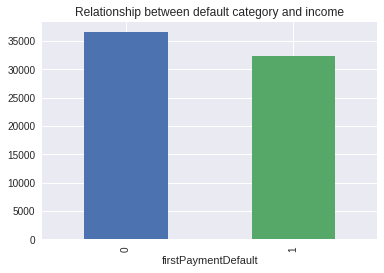

In [0]:
plt.title('Relationship between default category and income')
df.groupby('firstPaymentDefault').loanAmount.mean().plot(kind='bar');

In [0]:
# get a dictionary of value counts to make a quick check for outlier, mistyped parameter, recurring values
dict_value = {a:b.value_counts() for a,b in df.items()}

In [0]:
# update the numerical features dataframe
num_var=df.select_dtypes(include=np.number)
# get their dtypes
num_var.dtypes

clientId                 int64
clientIncome           float64
clientAge                int64
loanNumber               int64
loanAmount               int64
interestRate           float64
loanTerm                 int64
max_amount_taken         int64
max_tenor_taken          int64
settleDays               int64
firstpaymentRatio      float64
firstPaymentDefault      int64
loanDefault              int64
clientAge_bin          float64
loanIncome_diff        float64
amount_diff              int64
reten_measure            int64
log_clientIncome       float64
clientIncome_bin         int64
dtype: object

In [0]:
# view number of unique observation
num_var.nunique()

clientId               91904
clientIncome            9362
clientAge                 43
loanNumber                32
loanAmount               483
interestRate             133
loanTerm                   3
max_amount_taken           2
max_tenor_taken            2
settleDays               419
firstpaymentRatio       4875
firstPaymentDefault        2
loanDefault                2
clientAge_bin              4
loanIncome_diff        12723
amount_diff                2
reten_measure              2
log_clientIncome        9362
clientIncome_bin           4
dtype: int64

In [0]:
num_var.corr()['loanDefault'].sort_values()

loanNumber            -0.080460
reten_measure         -0.075902
log_clientIncome      -0.049367
clientAge             -0.048228
clientIncome_bin      -0.042590
clientAge_bin         -0.042138
amount_diff           -0.036371
clientIncome          -0.035201
loanIncome_diff       -0.031577
loanAmount            -0.017319
clientId               0.002682
loanTerm               0.009177
interestRate           0.079144
max_amount_taken       0.100787
max_tenor_taken        0.104165
firstpaymentRatio      0.565268
firstPaymentDefault    0.624008
settleDays             0.626700
loanDefault            1.000000
Name: loanDefault, dtype: float64

In [0]:
# checking the distribution of incomeVerified
df.incomeVerified.value_counts()

false    133286
true      26207
Null        103
Name: incomeVerified, dtype: int64

In [0]:
# label encoding 
df['incomeVerified_encode']= df['incomeVerified'].replace({'False':0,'false':0,'true':1,'True':1,'Null':0})


In [0]:
# Checking for value count
df['incomeVerified_encode'].value_counts()

0    133389
1     26207
Name: incomeVerified_encode, dtype: int64

In [0]:
# mask true for 1 and false for 0
df['incomeVerified_encode']= df['incomeVerified_encode'].replace({False:0,True:1})

In [0]:
# re-check value count
df['incomeVerified_encode'].value_counts()

0    133389
1     26207
Name: incomeVerified_encode, dtype: int64

In [0]:
# confriming if client truly has a phone contact or not
df.loc[df.clientNumberPhoneContacts=='Null',['clientNumberPhoneContacts','clientAvgCallsPerDay']]

,clientNumberPhoneContacts,clientAvgCallsPerDay
10,Null,Null
64,Null,Null
93,Null,Null
184,Null,Null
220,Null,Null
278,Null,Null
339,Null,Null
371,Null,Null
378,Null,Null
379,Null,Null


In [0]:
# check if when call per day is 0, the client phone number is null
df.loc[df.clientAvgCallsPerDay=='0',['clientNumberPhoneContacts','clientAvgCallsPerDay']]

,clientNumberPhoneContacts,clientAvgCallsPerDay
59,14,0
140,1,0
173,288,0
177,185,0
208,178,0
234,142,0
361,197,0
454,507,0
565,5,0
594,1,0


In [0]:
# extract categorical features
cat_var = df.select_dtypes(include=['O','category'])
cat_var.head()

,incomeVerified,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,clientTimeAtEmployer,clientNumberPhoneContacts,clientAvgCallsPerDay,applicationDate,approvalDate,declinedDate,disbursementDate,RPdueDate,paidAt,rILoanId,repaidDate,rIdueDate
0,false,FEMALE,Single,business,Rented,KANO,7,257,153,2018-07-12,2018-07-12,Null,2018-07-12,2018-09-10 06:35:11 UTC,2018-09-04 11:54:00 UTC,302039538823,2018-08-01 11:30:31 UTC,2018-08-13 12:00:00 UTC
1,false,MALE,Single,business,Rented,LAGOS,21,3964,269.42641509433963,2018-08-22,2018-08-22,Null,2018-08-22,2018-10-21 07:13:29 UTC,2018-09-06 04:44:04 UTC,302251936174,2018-09-06 05:34:55 UTC,2018-09-21 12:00:00 UTC
2,false,MALE,Single,education,Rented,ANAMBRA,29,1140,77.14782608695653,2018-08-25,2018-08-25,Null,2018-08-25,2018-10-23 11:00:00 UTC,Null,302270229003,2018-11-27 01:33:56 UTC,2018-09-24 12:00:00 UTC
3,false,FEMALE,Married,business,Own Residence,OSUN,36+,2764,31.678111587982833,2018-06-19,2018-06-19,Null,2018-06-19,2018-08-18 04:21:05 UTC,2018-07-10 11:23:31 UTC,301929229685,2018-07-09 06:48:44 UTC,2018-07-19 12:00:00 UTC
4,false,MALE,Married,medical,Rented,ONDO,36+,504,3,2018-06-02,2018-06-02,Null,2018-06-02,2018-08-01 07:31:40 UTC,2018-08-09 06:05:37 UTC,301841795739,2018-07-14 02:28:10 UTC,2018-07-02 12:00:00 UTC


In [0]:
# check for distribution
df.clientNumberPhoneContacts.value_counts()

Null     2708
200       216
400       186
310       166
350       149
542       148
360       147
600       146
476       145
325       145
356       144
314       142
376       142
301       142
417       141
395       141
388       140
269       140
410       139
317       139
541       139
398       139
293       138
330       137
414       137
455       137
344       137
592       137
347       136
211       136
         ... 
5176        1
5040        1
20467       1
7469        1
9789        1
6249        1
7216        1
9752        1
13744       1
5807        1
12117       1
13649       1
9156        1
5509        1
6361        1
6170        1
9636        1
5106        1
9355        1
5949        1
8857        1
8785        1
9542        1
9875        1
4444        1
7509        1
9501        1
7405        1
7933        1
11991       1
Name: clientNumberPhoneContacts, Length: 7378, dtype: int64

In [0]:
#change clientNumberPhoneContacts to numeric type
def change_to_numeric(x):
  if x == 'Null': 
    return 0
  else: 
    return int(x)
  
df.clientNumberPhoneContacts=df.clientNumberPhoneContacts.apply(change_to_numeric)



In [0]:
# check for the each value count
df.clientNumberPhoneContacts.value_counts()

0        2709
200       216
400       186
310       166
350       149
542       148
360       147
600       146
476       145
325       145
356       144
376       142
314       142
301       142
395       141
417       141
388       140
269       140
398       139
317       139
410       139
541       139
293       138
455       137
344       137
414       137
592       137
330       137
347       136
299       136
         ... 
6212        1
4433        1
5653        1
7597        1
9875        1
5877        1
7956        1
5909        1
5201        1
6113        1
5073        1
7924        1
4945        1
7469        1
15060       1
4817        1
8348        1
6864        1
10337       1
4378        1
6736        1
60595       1
4506        1
10434       1
5493        1
12662       1
5292        1
11435       1
10781       1
5981        1
Name: clientNumberPhoneContacts, Length: 7377, dtype: int64

In [0]:
# check the new dtype
df.clientNumberPhoneContacts.dtype

dtype('int64')

In [0]:
df.clientAvgCallsPerDay.value_counts()

0                     3639
Null                  2687
1                      899
2                      672
3                      592
4                      454
7                      387
5                      383
6                      358
8                      288
9                      276
10                     260
12                     249
11                     246
14                     208
13                     205
15                     201
18                     195
17                     176
20                     164
19                     163
21                     162
16                     155
23                     155
22                     149
26                     139
29                     137
28                     136
25                     130
24                     126
                      ... 
57.563876651982376       1
43.78688524590164        1
17.99421965317919        1
54.82962962962963        1
2.4324324324324325       1
20.646017699115045       1
2

In [0]:
#change clientAvgCallsPerDay to numeric type
def change_to_numeric1(x):
  if x == 'Null': 
    return 0
  else: 
    return float(x)


In [0]:
# repeat same step for clientAvgCallsPerDay by considering all Null as 0
df.clientAvgCallsPerDay = df.clientAvgCallsPerDay.apply(change_to_numeric1)

In [0]:
df.clientAvgCallsPerDay.dtype

dtype('float64')

In [0]:
num_var=df.select_dtypes('number')
num_var.corr()['loanDefault'].sort_values()

loanNumber                  -0.080460
reten_measure               -0.075902
incomeVerified_encode       -0.049548
log_clientIncome            -0.049367
clientAge                   -0.048228
clientIncome_bin            -0.042590
clientAge_bin               -0.042138
amount_diff                 -0.036371
clientIncome                -0.035201
loanIncome_diff             -0.031577
clientNumberPhoneContacts   -0.028477
clientAvgCallsPerDay        -0.027286
loanAmount                  -0.017319
clientId                     0.002682
loanTerm                     0.009177
interestRate                 0.079144
max_amount_taken             0.100787
max_tenor_taken              0.104165
firstpaymentRatio            0.565268
firstPaymentDefault          0.624008
settleDays                   0.626700
loanDefault                  1.000000
Name: loanDefault, dtype: float64

In [0]:
# creating new features
df['contactedPerDay'] = df['clientAvgCallsPerDay']/df['clientNumberPhoneContacts']

In [0]:
df['contactedPerDay']

0         0.595331
1         0.067968
2         0.067674
3         0.011461
4         0.005952
5         0.065725
6         0.002060
7         0.069042
8         0.019014
9         0.030374
10             NaN
11        0.043922
12        0.007807
13        0.382049
14        0.043428
15        0.054745
16        0.001770
17        0.024865
18        0.088436
19        0.058140
20        0.046360
21        0.062649
22        0.011623
23        0.086823
24        0.029932
25        0.133772
26        0.098972
27        0.052553
28        0.001661
29        0.004011
            ...   
159566    0.259615
159567    0.002340
159568    0.031732
159569    0.007530
159570    0.013996
159571    1.416327
159572    0.106540
159573    0.041491
159574    1.375000
159575    0.014497
159576    0.016944
159577    0.056495
159578    0.045455
159579    0.061177
159580    0.284739
159581    0.016065
159582    0.054419
159583    0.331776
159584    0.000000
159585    0.000000
159586    0.118786
159587    0.

In [0]:
num_var=df.select_dtypes('number')
num_var.corr()['loanDefault'].sort_values()

loanNumber                  -0.080460
reten_measure               -0.075902
incomeVerified_encode       -0.049548
log_clientIncome            -0.049367
clientAge                   -0.048228
clientIncome_bin            -0.042590
clientAge_bin               -0.042138
amount_diff                 -0.036371
clientIncome                -0.035201
loanIncome_diff             -0.031577
clientNumberPhoneContacts   -0.028477
clientAvgCallsPerDay        -0.027286
loanAmount                  -0.017319
clientId                     0.002682
contactedPerDay              0.006054
loanTerm                     0.009177
interestRate                 0.079144
max_amount_taken             0.100787
max_tenor_taken              0.104165
firstpaymentRatio            0.565268
firstPaymentDefault          0.624008
settleDays                   0.626700
loanDefault                  1.000000
Name: loanDefault, dtype: float64

In [0]:
df.clientTimeAtEmployer.value_counts()

36+     87294
Null     4194
0        3373
24       2926
12       2643
3        2391
2        2358
13       2356
1        2325
4        2295
5        2202
6        2142
7        2039
9        1991
8        1910
15       1886
14       1882
16       1860
25       1847
11       1813
17       1767
26       1763
10       1741
27       1731
23       1704
28       1688
18       1673
22       1582
29       1576
20       1562
21       1513
19       1510
31       1425
30       1418
32       1375
34       1287
35       1282
33       1268
-6          2
-7          1
-5          1
Name: clientTimeAtEmployer, dtype: int64

In [0]:
#change clientTimeAtEmployer to numeric type
def change_to_numeric2(x):
  if x == 'Null': 
    return 0
  elif x == '36+': return 36
  elif '-' in x: return 0
  else: 
    return float(x)

In [0]:
# apply the transformation on the column
df.clientTimeAtEmployer=df.clientTimeAtEmployer.apply(change_to_numeric2)

In [0]:
df.clientTimeAtEmployer.dtype

dtype('float64')

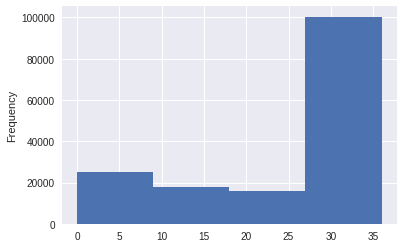

In [0]:
df.clientTimeAtEmployer.plot(kind='hist',bins=4)

In [0]:
# create a new feature by binning clientTimeAtEmployer based on the year
bins=[0,12,24,35,36]
group=['one','two','three','more']
df['clientTimeAtEmployer_year']=pd.cut(df['clientTimeAtEmployer'],bins,labels=group)


In [0]:
df['clientTimeAtEmployer_year'].dtypes

CategoricalDtype(categories=['one', 'two', 'three', 'more'], ordered=True)

In [0]:
num_var=df.select_dtypes('number')
num_var.corr()['loanDefault'].sort_values()

loanNumber                  -0.080460
reten_measure               -0.075902
incomeVerified_encode       -0.049548
log_clientIncome            -0.049367
clientAge                   -0.048228
clientIncome_bin            -0.042590
clientAge_bin               -0.042138
amount_diff                 -0.036371
clientIncome                -0.035201
loanIncome_diff             -0.031577
clientNumberPhoneContacts   -0.028477
clientAvgCallsPerDay        -0.027286
loanAmount                  -0.017319
clientTimeAtEmployer        -0.005699
clientId                     0.002682
contactedPerDay              0.006054
loanTerm                     0.009177
interestRate                 0.079144
max_amount_taken             0.100787
max_tenor_taken              0.104165
firstpaymentRatio            0.565268
firstPaymentDefault          0.624008
settleDays                   0.626700
loanDefault                  1.000000
Name: loanDefault, dtype: float64

In [0]:
df.clientState.value_counts()

LAGOS          60666
OGUN           14798
ABUJA          13999
OYO            12731
RIVERS          7829
DELTA           5081
KWARA           3969
OSUN            3816
ONDO            3571
KADUNA          3496
EDO             2663
NIGER           2462
BENUE           2043
EKITI           2023
AKWA IBOM       1960
KOGI            1896
PLATEAU         1715
CROSS RIVER     1608
NASARAWA        1589
ENUGU           1566
ANAMBRA         1496
ABIA            1426
IMO             1287
KANO            1233
BAYELSA         1179
ADAMAWA          569
BAUCHI           418
SOKOTO           398
EBONYI           392
TARABA           336
KEBBI            279
GOMBE            265
KATSINA          248
ZAMFARA          221
BORNO            210
YOBE              83
JIGAWA            72
LAGOS              1
Null               1
OJO                1
Name: clientState, dtype: int64

In [0]:
# remove trailing space and treat mistype inpute
df.clientState=(df.clientState.str.strip()
                 .replace({'Null':'LAGOS','OJO':'LAGOS'}))

In [0]:
# create dictionary for geo-political zones by state
dictionary = {'SW':['OGUN','OYO','EKITI','OSUN','ONDO'],'SE':['ANAMBRA','EBONYI','ENUGU','IMO','ABIA'],
       'SS':['EDO','RIVERS','DELTA','BAYELSA','AKWA IBOM','CROSS RIVER'],
      'NC':['BENUE','ABUJA','KOGI','KWARA','NASARAWA','NIGER','PLATEAU'],'NE':['ADAMAWA','BAUCHI','BORNO','GOMBE','TARABA','YOBE'],
      'NW':['JIGAWA','KADUNA','KANO','KATSINA','KEBBI','SOKOTO','ZAMFARA'],'LAGOS':'LAGOS'}

In [0]:
# a function to map state into zone
def transform_state(x):
  if x in dictionary['SW']:return 'SW'
  elif x in dictionary['SS']: return 'SS'
  elif x in dictionary['SE']: return 'SE'
  elif x in dictionary['NC']: return 'NC'
  elif x in dictionary['NW']: return 'NW'
  elif x in dictionary['NE']: return 'NE'
  else: return 'LAGOS'

In [0]:
# apply the function
df.clientState=df.clientState.apply(transform_state)

In [0]:
df.clientState.value_counts()

LAGOS    60669
SW       36939
NC       27673
SS       20320
SE        6167
NW        5947
NE        1881
Name: clientState, dtype: int64

In [0]:
# label encoding process
df['clientState_encode']= df['clientState'].replace({'LAGOS':0,'SW':1,'NC':2,'SS':3,'SE':4,'NW':5,'NE':6})

In [0]:
from datetime import datetime

In [0]:
# change to date data type
df['applicationDate'] = pd.to_datetime(df['applicationDate'],errors='coerce')

In [0]:
# change others datetime to date
date_column = ['approvalDate','disbursementDate','rIdueDate','paidAt','declinedDate']
for dt in date_column:
  df[dt] = pd.to_datetime(df[dt],errors='coerce')

In [0]:
# check for categorical varibale left
cat_var=df.select_dtypes(include=['O','category'])
cat_var.columns

Index(['incomeVerified', 'clientGender', 'clientMaritalStatus',
       'clientLoanPurpose', 'clientResidentialStauts', 'clientState',
       'RPdueDate', 'rILoanId', 'repaidDate', 'clientTimeAtEmployer_year'],
      dtype='object')

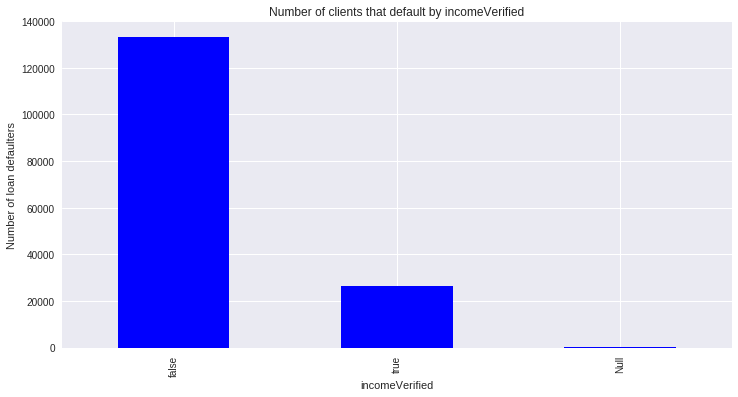

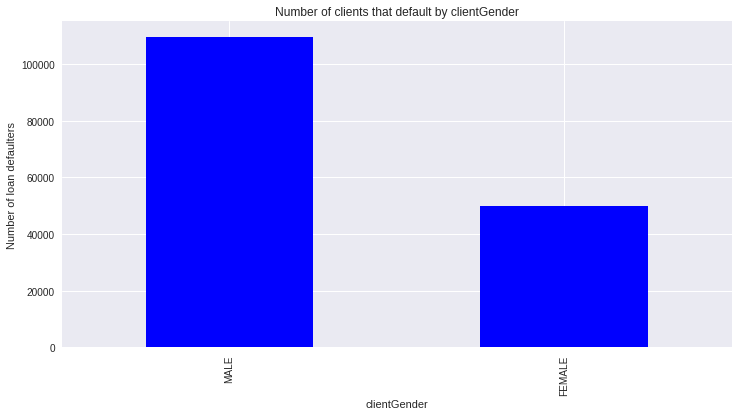

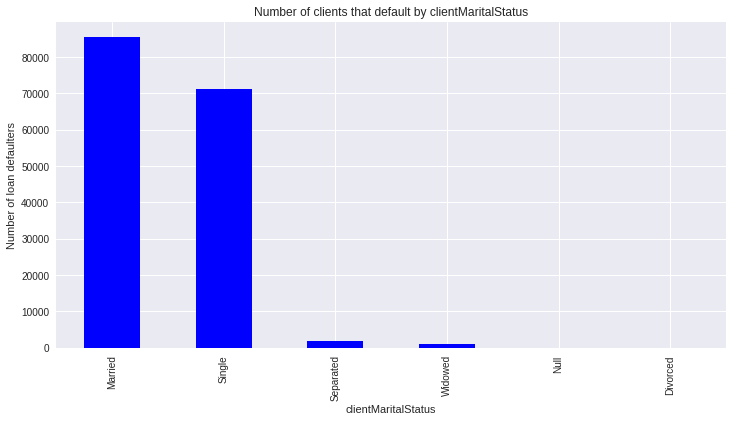

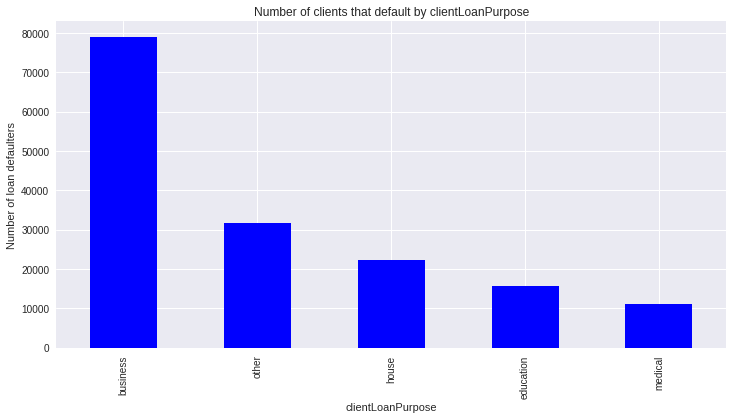

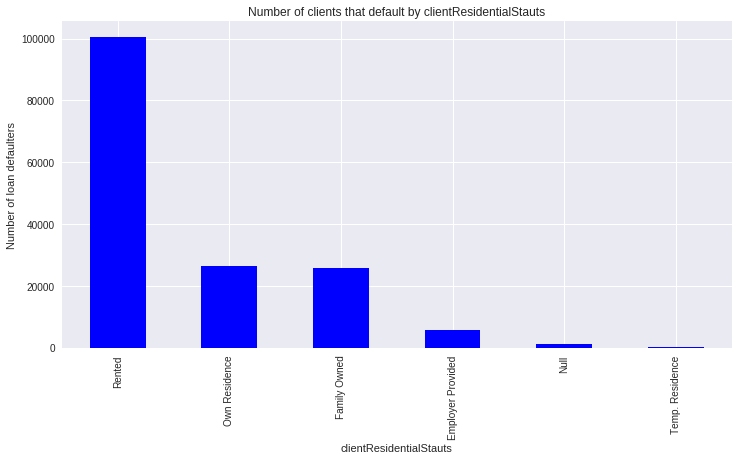

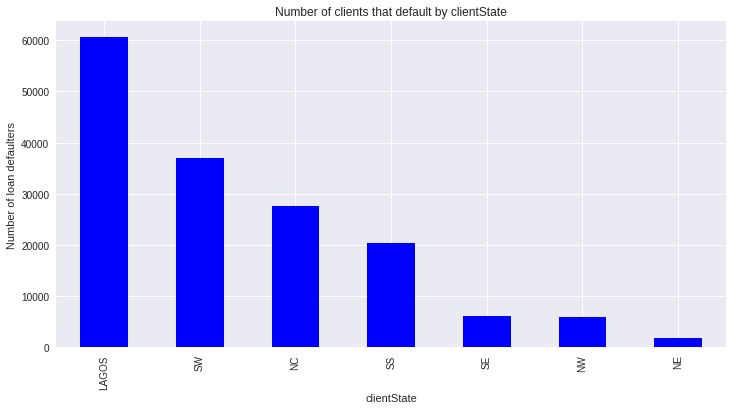

In [0]:
plot_bars(df,['incomeVerified', 'clientGender', 'clientMaritalStatus',
       'clientLoanPurpose', 'clientResidentialStauts', 'clientState'])

In [0]:
# check dtype of date time object
df.applicationDate.dtype

dtype('<M8[ns]')

In [0]:
df.disbursementDate.dtype

dtype('<M8[ns]')

In [0]:
# get number of unique observation
df.nunique()

clientId                      91904
clientIncome                   9362
incomeVerified                    3
clientAge                        43
clientGender                      2
clientMaritalStatus               6
clientLoanPurpose                 5
clientResidentialStauts           6
clientState                       7
clientTimeAtEmployer             37
clientNumberPhoneContacts      7377
clientAvgCallsPerDay         100306
loanNumber                       32
applicationDate                 316
approvalDate                    316
declinedDate                      5
disbursementDate                305
RPdueDate                    157900
paidAt                       125481
loanAmount                      483
interestRate                    133
loanTerm                          3
max_amount_taken                  2
max_tenor_taken                   2
rILoanId                     159596
repaidDate                   138121
rIdueDate                       301
settleDays                  

In [0]:
df.approvalDate.dtype

dtype('<M8[ns]')

In [0]:
#checking if all loan are approved same day as day of application
df.applicationDate - df.approvalDate

0        0 days
1        0 days
2        0 days
3        0 days
4        0 days
5        0 days
6        0 days
7        0 days
8        0 days
9        0 days
10       0 days
11       0 days
12       0 days
13       0 days
14       0 days
15       0 days
16       0 days
17       0 days
18       0 days
19       0 days
20       0 days
21       0 days
22       0 days
23       0 days
24       0 days
25       0 days
26       0 days
27       0 days
28       0 days
29       0 days
          ...  
159566   0 days
159567   0 days
159568   0 days
159569   0 days
159570   0 days
159571   0 days
159572   0 days
159573   0 days
159574   0 days
159575   0 days
159576   0 days
159577   0 days
159578   0 days
159579   0 days
159580   0 days
159581   0 days
159582   0 days
159583   0 days
159584   0 days
159585   0 days
159586   0 days
159587   0 days
159588   0 days
159589   0 days
159590   0 days
159591   0 days
159592   0 days
159593   0 days
159594   0 days
159595   0 days
Length: 159596, dtype: t

In [0]:
cat_var = df.select_dtypes(include=['O','category'])
cat_var.head()

,incomeVerified,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,RPdueDate,rILoanId,repaidDate,clientTimeAtEmployer_year
0,false,FEMALE,Single,business,Rented,NW,2018-09-10 06:35:11 UTC,302039538823,2018-08-01 11:30:31 UTC,one
1,false,MALE,Single,business,Rented,LAGOS,2018-10-21 07:13:29 UTC,302251936174,2018-09-06 05:34:55 UTC,two
2,false,MALE,Single,education,Rented,SE,2018-10-23 11:00:00 UTC,302270229003,2018-11-27 01:33:56 UTC,three
3,false,FEMALE,Married,business,Own Residence,SW,2018-08-18 04:21:05 UTC,301929229685,2018-07-09 06:48:44 UTC,more
4,false,MALE,Married,medical,Rented,SW,2018-08-01 07:31:40 UTC,301841795739,2018-07-14 02:28:10 UTC,more


In [0]:
# Feature engineering
# creating a new feature called deliquency_duration which is the time between dueDate and paidAt date
interval=df.rIdueDate - df.paidAt
df['deliquency_duration'] = interval.dt.days

In [0]:
df.deliquency_duration

0         -22.0
1          15.0
2           NaN
3           9.0
4         -38.0
5         -44.0
6         -18.0
7         -45.0
8         -17.0
9        -104.0
10          NaN
11          NaN
12        -48.0
13         19.0
14          NaN
15          NaN
16       -202.0
17       -170.0
18        -84.0
19       -107.0
20          NaN
21          NaN
22          NaN
23        -80.0
24         23.0
25        -51.0
26        -28.0
27          NaN
28         25.0
29        -53.0
          ...  
159566    -26.0
159567    -60.0
159568    -29.0
159569    -34.0
159570   -103.0
159571     -4.0
159572      1.0
159573    -29.0
159574      1.0
159575    -30.0
159576    -29.0
159577     -8.0
159578      1.0
159579    -56.0
159580      1.0
159581      NaN
159582      1.0
159583    -35.0
159584    -60.0
159585      NaN
159586    -64.0
159587    -10.0
159588      1.0
159589      1.0
159590    -47.0
159591      NaN
159592    -60.0
159593   -150.0
159594    -35.0
159595    -32.0
Name: deliquency_duratio

In [0]:
#  change any non-value which implies that client defualt with a duration of 360
df.deliquency_duration.fillna(360,inplace=True)

In [0]:
num_var.columns

Index(['clientId', 'clientIncome', 'clientAge', 'clientTimeAtEmployer',
       'clientNumberPhoneContacts', 'clientAvgCallsPerDay', 'loanNumber',
       'loanAmount', 'interestRate', 'loanTerm', 'max_amount_taken',
       'max_tenor_taken', 'settleDays', 'firstpaymentRatio',
       'firstPaymentDefault', 'loanDefault', 'clientAge_bin',
       'loanIncome_diff', 'amount_diff', 'reten_measure', 'log_clientIncome',
       'clientIncome_bin', 'incomeVerified_encode', 'contactedPerDay'],
      dtype='object')

In [0]:
# Creating a new feature
df['intstall_paymnt']=(df['loanAmount']/df['loanTerm'])*1000

In [0]:
#feature creation
df['BalanceIncome']=df['clientIncome']-(df['intstall_paymnt'])

In [0]:
num_var=df.select_dtypes('number')
num_var.corr()['loanDefault'].sort_values()

loanNumber                  -0.080460
reten_measure               -0.075902
incomeVerified_encode       -0.049548
log_clientIncome            -0.049367
clientAge                   -0.048228
intstall_paymnt             -0.045617
clientIncome_bin            -0.042590
clientAge_bin               -0.042138
amount_diff                 -0.036371
clientIncome                -0.035201
loanIncome_diff             -0.031577
clientNumberPhoneContacts   -0.028477
clientAvgCallsPerDay        -0.027286
loanAmount                  -0.017319
clientTimeAtEmployer        -0.005699
clientId                     0.002682
contactedPerDay              0.006054
loanTerm                     0.009177
clientState_encode           0.010520
BalanceIncome                0.029169
interestRate                 0.079144
max_amount_taken             0.100787
max_tenor_taken              0.104165
firstpaymentRatio            0.565268
firstPaymentDefault          0.624008
settleDays                   0.626700
deliquency_d

In [0]:
# check for distribution in marital status
df.clientMaritalStatus.value_counts()

Married      85492
Single       71361
Separated     1795
Widowed        939
Null             6
Divorced         3
Name: clientMaritalStatus, dtype: int64

In [0]:
df.clientMaritalStatus.unique()

array(['Single', 'Married', 'Separated', 'Widowed', 'Divorced', 'Null'],
      dtype=object)

In [0]:
df.clientMaritalStatus.mode()

0    Married
dtype: object

In [0]:
# replace null value with modal value which is 'Married'
df.clientMaritalStatus.replace('Null','Married',inplace=True)


In [0]:
df.clientMaritalStatus.value_counts()

Married      85498
Single       71361
Separated     1795
Widowed        939
Divorced         3
Name: clientMaritalStatus, dtype: int64

In [0]:
# let transform others marital status except married to one group
df["marital_status_decode"] = 'Married'
df.loc[df["clientMaritalStatus"]!='Married' ,"marital_status_decode"] = 'others'

In [0]:
df["marital_status_decode"].value_counts()

Married    85498
others     74098
Name: marital_status_decode, dtype: int64

In [0]:
df.clientResidentialStauts.value_counts()

Rented               100534
Own Residence         26406
Family Owned          25668
Employer Provided      5589
Null                   1136
Temp. Residence         263
Name: clientResidentialStauts, dtype: int64

In [0]:
# get a descriptive summary of object type and categorical 
df.describe(include=['O','category'])

,incomeVerified,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,RPdueDate,rILoanId,repaidDate,clientTimeAtEmployer_year,marital_status_decode
count,159596,159596,159596,159596,159596,159596,159596,159596,159596,152025,159596
unique,3,2,5,5,6,7,157900,159596,138121,4,2
top,false,MALE,Married,business,Rented,LAGOS,2018-10-23 11:00:00 UTC,302499578641,Null,more,Married
freq,133286,109666,85498,78976,100534,60669,95,1,19471,87294,85498


In [0]:
df.clientResidentialStauts.dtype

dtype('O')

In [0]:
df.select_dtypes(include=['O','category']).columns

Index(['incomeVerified', 'clientGender', 'clientMaritalStatus',
       'clientLoanPurpose', 'clientResidentialStauts', 'clientState',
       'RPdueDate', 'rILoanId', 'repaidDate', 'clientTimeAtEmployer_year',
       'marital_status_decode'],
      dtype='object')

In [0]:
cat_var = df.select_dtypes(include=['O','category'])
cat_var.columns

Index(['incomeVerified', 'clientGender', 'clientMaritalStatus',
       'clientLoanPurpose', 'clientResidentialStauts', 'clientState',
       'RPdueDate', 'rILoanId', 'repaidDate', 'clientTimeAtEmployer_year',
       'marital_status_decode'],
      dtype='object')

In [0]:
num_var.columns

Index(['clientId', 'clientIncome', 'clientAge', 'clientTimeAtEmployer',
       'clientNumberPhoneContacts', 'clientAvgCallsPerDay', 'loanNumber',
       'loanAmount', 'interestRate', 'loanTerm', 'max_amount_taken',
       'max_tenor_taken', 'settleDays', 'firstpaymentRatio',
       'firstPaymentDefault', 'loanDefault', 'clientAge_bin',
       'loanIncome_diff', 'amount_diff', 'reten_measure', 'log_clientIncome',
       'clientIncome_bin', 'incomeVerified_encode', 'contactedPerDay',
       'clientState_encode', 'deliquency_duration', 'intstall_paymnt',
       'BalanceIncome'],
      dtype='object')

In [0]:
# Find all correlations and sort 
correlations_data = df.corr()['loanDefault'].sort_values()


print(correlations_data)


loanNumber                  -0.080460
reten_measure               -0.075902
incomeVerified_encode       -0.049548
log_clientIncome            -0.049367
clientAge                   -0.048228
intstall_paymnt             -0.045617
clientIncome_bin            -0.042590
clientAge_bin               -0.042138
amount_diff                 -0.036371
clientIncome                -0.035201
loanIncome_diff             -0.031577
clientNumberPhoneContacts   -0.028477
clientAvgCallsPerDay        -0.027286
loanAmount                  -0.017319
clientTimeAtEmployer        -0.005699
clientId                     0.002682
contactedPerDay              0.006054
loanTerm                     0.009177
clientState_encode           0.010520
BalanceIncome                0.029169
interestRate                 0.079144
max_amount_taken             0.100787
max_tenor_taken              0.104165
firstpaymentRatio            0.565268
firstPaymentDefault          0.624008
settleDays                   0.626700
deliquency_d

In [0]:
# Select the numeric columns
numeric_subset = df.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'loanDefault':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


In [0]:
# Find all correlations and sort 
corr_num = numeric_subset.corr()['loanDefault'].sort_values()


print(corr_num)

loanNumber                      -0.080460
reten_measure                   -0.075902
log_loanNumber                  -0.069431
log_clientAge                   -0.053085
log_log_clientIncome            -0.049881
incomeVerified_encode           -0.049548
log_clientIncome                -0.049367
clientAge                       -0.048228
intstall_paymnt                 -0.045617
log_intstall_paymnt             -0.043000
clientIncome_bin                -0.042590
clientAge_bin                   -0.042138
log_clientAvgCallsPerDay        -0.038175
amount_diff                     -0.036371
log_clientState_encode          -0.036343
log_clientNumberPhoneContacts   -0.036292
clientIncome                    -0.035201
log_loanIncome_diff             -0.035142
loanIncome_diff                 -0.031577
clientNumberPhoneContacts       -0.028477
clientAvgCallsPerDay            -0.027286
log_loanAmount                  -0.021814
log_clientIncome_bin            -0.020768
loanAmount                      -0

In [0]:
# Dropping any column with all na values
numeric_subset  = numeric_subset.dropna(axis=1, how = 'all')
numeric_subset.shape

(159596, 54)

In [0]:
# get correlation between variables and set those less than 0.025 to 0  
c_corr=numeric_subset.corr().applymap(lambda x: x if abs(x)>0.025 else 0)
c_corr

,clientId,clientIncome,clientAge,clientTimeAtEmployer,clientNumberPhoneContacts,clientAvgCallsPerDay,loanNumber,loanAmount,interestRate,loanTerm,...,log_amount_diff,log_reten_measure,log_log_clientIncome,log_clientIncome_bin,log_incomeVerified_encode,log_contactedPerDay,log_clientState_encode,log_deliquency_duration,log_intstall_paymnt,log_BalanceIncome
clientId,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
clientIncome,0.000000,1.000000,0.174696,0.125280,0.049122,0.063294,0.000000,0.287372,-0.127846,0.073712,...,0,0,0.828855,0.845663,0,0.048673,0.025928,-0.057763,0.318678,0.455612
clientAge,0.000000,0.174696,1.000000,0.339582,0.079686,-0.095028,-0.046518,0.146243,-0.160300,0.073489,...,0,0,0.223868,0.102829,0,-0.162331,-0.045693,0.000000,0.198091,-0.092608
clientTimeAtEmployer,0.000000,0.125280,0.339582,1.000000,0.034022,-0.077688,-0.042551,0.080959,-0.092005,0.044473,...,0,0,0.172744,0.061954,0,-0.109962,-0.051322,0.000000,0.114812,0.000000
clientNumberPhoneContacts,0.000000,0.049122,0.079686,0.034022,1.000000,0.261702,0.126658,0.157566,-0.183935,0.143265,...,0,0,0.044558,0.053907,0,-0.293491,0.000000,0.000000,0.104646,0.000000
clientAvgCallsPerDay,0.000000,0.063294,-0.095028,-0.077688,0.261702,1.000000,0.067146,0.087068,-0.088065,0.064188,...,0,0,0.060951,0.054328,0,0.441246,0.000000,-0.047102,0.062652,0.000000
loanNumber,0.000000,0.000000,-0.046518,-0.042551,0.126658,0.067146,1.000000,0.228146,-0.300269,0.250372,...,0,0,0.000000,0.000000,0,-0.041611,0.000000,-0.044169,0.134230,0.000000
loanAmount,0.000000,0.287372,0.146243,0.080959,0.157566,0.087068,0.228146,1.000000,-0.621150,0.676446,...,0,0,0.288939,0.191333,0,0.000000,0.030801,0.105775,0.668652,-0.115511
interestRate,0.000000,-0.127846,-0.160300,-0.092005,-0.183935,-0.088065,-0.300269,-0.621150,1.000000,-0.739680,...,0,0,-0.187537,-0.063665,0,0.029623,0.000000,-0.025485,-0.367474,0.086190
loanTerm,0.000000,0.073712,0.073489,0.044473,0.143265,0.064188,0.250372,0.676446,-0.739680,1.000000,...,0,0,0.120678,0.034086,0,-0.035109,0.000000,0.191294,0.082398,0.000000


In [0]:
# re-arrange to make loanDefault positioned as the last column
c_corr_sorted = c_corr.reindex(columns=( list([a for a in c_corr.columns if a != 'loanDefault']) +['loanDefault'] ),
                      index=( list([a for a in c_corr.columns if a != 'loanDefault']) +['loanDefault']))

In [0]:
# select variables that have good correlation with loanDefault
correlated_var=c_corr.loc[c_corr.loanDefault != 0 ,'loanDefault']
correlated_var.sort_values().to_frame()

,loanDefault
loanNumber,-0.080460
reten_measure,-0.075902
log_loanNumber,-0.069431
log_clientAge,-0.053085
log_log_clientIncome,-0.049881
incomeVerified_encode,-0.049548
log_clientIncome,-0.049367
clientAge,-0.048228
intstall_paymnt,-0.045617
log_intstall_paymnt,-0.043000


In [0]:
# Select the categorical columns

categorical_subset = ['clientState','clientLoanPurpose','clientResidentialStauts']
# One hot encode
categorical_subset = pd.get_dummies(df[categorical_subset])

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset[correlated_var.index], categorical_subset], axis = 1)

features.shape

(159596, 52)

In [0]:
#drop any null or na
features = features.dropna(axis=1, how = 'all')
features.shape

(159596, 52)

In [0]:
# split into targeta and predictor
target = features['loanDefault']
features.drop(columns = ['loanDefault'],inplace=True)

In [0]:
# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

In [0]:
features.shape

(159596, 52)

In [0]:
target.value_counts()

0    114926
1     44670
Name: loanDefault, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


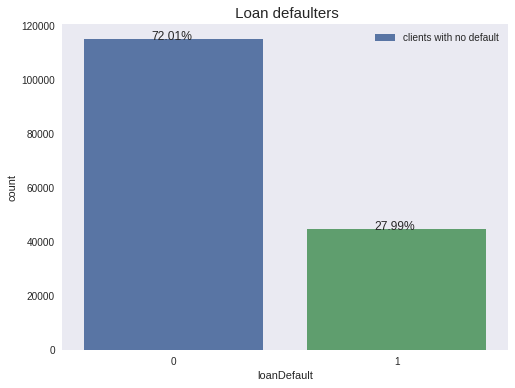

In [0]:
# visualize the Credit_History to get glimpse of the picture
fig=plt.figure(figsize=(8,6))
sns.set(style="dark")
ax=sns.countplot(x='loanDefault',data=df,
             order=list(dict_value['loanDefault'].index))
ax.set_title(' Loan defaulters', fontsize=15)
ax.legend(['clients with no default'])
sns.despine(left=True,bottom=True)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height()/dict_value['loanDefault'].sum())*100),
                (p.get_x()+0.30, p.get_height()+1))

In [0]:
X=features
y=target

In [0]:
features.head().T

,0,1,2,3,4
clientIncome,52500.000000,52500.000000,35000.000000,35000.000000,35000.000000
clientAge,29.000000,25.000000,32.000000,28.000000,34.000000
clientNumberPhoneContacts,257.000000,3964.000000,1140.000000,2764.000000,504.000000
clientAvgCallsPerDay,153.000000,269.426415,77.147826,31.678112,3.000000
loanNumber,6.000000,9.000000,2.000000,4.000000,5.000000
interestRate,20.000000,15.000000,15.000000,15.000000,12.500000
max_amount_taken,1.000000,0.000000,0.000000,1.000000,1.000000
max_tenor_taken,1.000000,1.000000,1.000000,1.000000,1.000000
settleDays,-12.000000,-15.000000,64.000000,-10.000000,12.000000
firstpaymentRatio,0.000000,0.000000,0.000000,0.000000,0.000000


In [0]:
# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [0]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [0]:
# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(X_train)

# Transform both training data and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

After detail exploratory and feature engineering processes. The following line of codes performs deep learning (Random Forest and Neural Network) on the datasets

In [0]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [0]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.0094


In [0]:
from sklearn.ensemble import RandomForestClassifier
different_model_comparison = {
    "Random Forest":RandomForestClassifier(random_state=0,n_estimators=10)}

In [0]:
def train_model(model_dict,X_train,y_train):
    for model in model_dict:
        print("Training:",model)
        model_dict[model].fit(X_train,y_train)
    return model_dict

In [0]:
# Wrapping this function so we can easily change the model and evaluate them
# function to evaluate model performance 
from sklearn import metrics
def model_eval(clf_name,clf,X_test,y_test):
    print("Evaluating:",clf_name)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
    report = pd.Series({
        "model":clf_name,
        "precision":metrics.precision_score(y_test, y_pred),
        "recall":metrics.recall_score(y_test, y_pred),
        "f1":metrics.f1_score(y_test, y_pred),
        'roc_auc_score' : metrics.roc_auc_score(y_test, y_score)
    })
    # draw ROC 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
    plt.figure(1, figsize=(6,6))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.plot(fpr, tpr,label=clf_name)
    plt.plot([0,1],[0,1], color = 'black')
    plt.legend()
    return report,confusion_matrix

In [0]:
def train_eval_model(model_dict,X_train,y_train,X_test,y_test):
    cols = ['model', 'roc_auc_score', 'precision', 'recall','f1']
    model_report = pd.DataFrame(columns = cols)
    cm_dict = {}
    model_dict = train_model(model_dict,X_train,y_train)
    for model in model_dict:
        report,confusion_matrix = model_eval(model,model_dict[model],X_test,y_test)
        model_report = model_report.append(report,ignore_index=True)
        cm_dict[model] = confusion_matrix
    return model_report,cm_dict

In [0]:
def plot_which_bar(df,col_name):
    df.set_index("model").loc[:,col_name].plot(kind='bar', stacked=True, sort_columns=True, figsize = (16,10))
    plt.title(col_name)
    plt.show()

Training: Random Forest
Evaluating: Random Forest


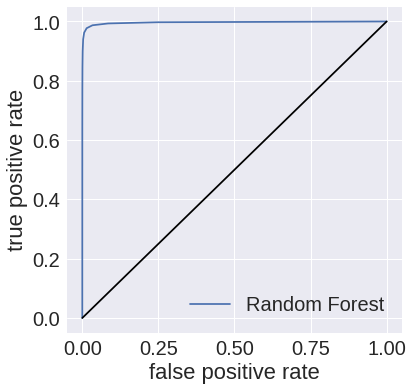

In [0]:
model_report,cm_dict = train_eval_model(different_model_comparison,X_train,y_train,X_test,y_test)

In [0]:
cm_dict

{'Random Forest': Predicted      0      1
 True                   
 0          34518     97
 1            797  12467}

In [0]:

from imblearn.over_sampling import SMOTE
index_split = int(len(X)*0.7) #30% testing

X_train_bal, y_train_bal = SMOTE(random_state=0).fit_sample(X_train,y_train)
X_test_bal, y_test_bal = X_test, y_test

In [0]:
len(X_train_bal)

160622

Training: Random Forest
Evaluating: Random Forest


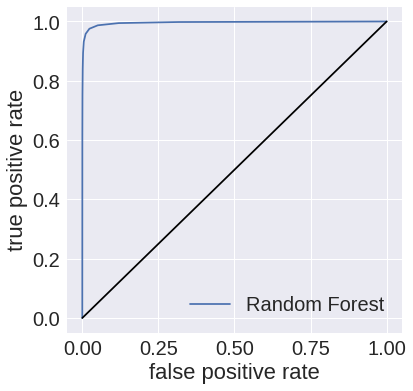

In [0]:
model_report_bal,cm_dict_bal = train_eval_model(different_model_comparison,X_train_bal,y_train_bal,X_test_bal,y_test_bal)

**NEURAL NETWORK SECTION**

In [0]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


# import the keras modules
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# othter packages
import numpy as np
import cv2
from imutils import build_montages

Using TensorFlow backend.


In [0]:
# number of epochs
NUM_EPOCHS = 10
# learning rate
INIT_LR = 1e-2
# batch size
BS = 32
# momentum
MOM = 0.9

In [0]:
# we are going to use stochastic gradient descent as our optimizer
opt = SGD(lr=INIT_LR, momentum=MOM, decay=INIT_LR / NUM_EPOCHS)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# we are using a sequential learning model
model = Sequential()
# our input shape is depth, height, width (in our case 1 sample x 28 pixels x 28 pixels)
inputShape = (1, 28, 28)

In [0]:
# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
model.add(Dropout(0.25))



# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
model.add(Dropout(0.25))


# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`


In [0]:
!git init

Initialized empty Git repository in /content/.git/


In [0]:
!git config --global user.email "oludoyimayowa1@gmail.com"

In [0]:
!git config --global user.name "MideOludoyi"

In [2]:
!git add -A

fatal: not a git repository (or any of the parent directories): .git
